# Load the Data

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load the train.csv file into a DataFrame name train_data_set
train_data_set = pd.read_csv('train.csv')

# Load the test.csv file into a DataFrame name test_data_set
test_data_set = pd.read_csv('test.csv')

**Load Stop words based on "Kharazi" stop words**

In [ ]:
# Load the Stop words from persian file (kharazi stop words)
with open('persian.txt', 'r', encoding='utf-8') as file:
    persian_stop_words = [line.strip() for line in file]
print(persian_stop_words)

['\ufeff.', '!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان', 'آسیب پذیرند', 'آشنایند', 'آشکارا', 'آقا', 'آقای', 'آقایان', 'آمد', 'آمدن', 'آمده', 'آمرانه', 'آن', 'آن گاه', 'آنان', 'آنانی', 'آنجا', 'آنرا', 'آنطور', 'آنقدر', 'آنها', 'آنهاست', 'آنچنان', 'آنچنان که', 'اونجور', 'اونجوری', 'اونجوری که', 'آنچه', 'آنکه', 'آنگاه', 'آن\u200cها', 'آهان', 'آهای', 'آور', 'آورد', 'آوردن', 'آورده', 'آوه', 'آی', 'آیا', 'آید', 'آیند', 'ا', 'اتفاقا', 'اثرِ', 'اجراست', 'احتراما', 'احتمالا', 'احیاناً', 'اخیر', 'اخیراً', 'اری', 'از', 'از آن پس', 'از بس که', 'از جمله', 'ازاین رو', 'ازجمله', 'ازش', 'اساسا', 'اساساً', 'است', 'استفاد', 'استفاده', 'اسلامی اند', 'اش', 'اشتباها', 'اشکارا', 'اصلا', 'اصلاً', 'اصولا', 'اصولاً', 'اعلام', 'اغلب', 'افزود', 'افسوس', 'اقل', 'اقلیت', 'الا', 'الان', 'البته', 'البتّه', 'الهی', 'الی', 'ام', 'اما', 'امروز', 'امروزه', 'امسال', 'امشب', 'ا

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# &mdash; Pre-process the Data

* a) Tokenize doc into the sentences
* b) Tokenize sentences into the words
* c) Remove the stopwords and creat the bag_of_words without stopswords

**a) Tokenize doc into the sentences**

Train

In [ ]:
# Tokenize the comment into the list of sentences (train)
tokenized_sentences_train = []

for comment in train_data_set['comment']:
  tokenized_sentences_train.append(comment)

# Print the first few Snapp Comment as a sample
for i, news_text in enumerate(news_text_list[:5]):
    print(f"News {i + 1}: {news_text}\n")
print(tokenized_sentences_train[:5])

['واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح', 'قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از موقع رسید، شما ببین چقدرررررررررررر پلاک خفنههههه، من سالهاست مشتریشونم و سالهاست مزه بهشت میده غذاشون', 'قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط ظاهر فریبنده داره، پرش میکنن کالباس و قارچ', 'عالللی بود همه چه درست و به اندازه و کیفیت خوب، امیداورم همیشه کیفیتتون خوب باشه ما مشتری همیشگی بشیم', 'شیرینی وانیلی فقط یک مدل بود.']


Test

In [ ]:
# Tokenize the comment into the list of sentences (test)
tokenized_sentences_test = []

for comment in test_data_set['comment']:
  tokenized_sentences_test.append(comment)

print(tokenized_sentences_test[:5])

['غذا به موقع رسید و برخورد پیک خوب بود', 'نون فکر کنم مال چهار روز قبل بود کلا نمیشد خورد کراکف رو هم گریل رو بهش نشون داده بودن اصلا از رستوران انتظارم چیز دیگه\u200cای بود دفعه اولم نبود از این رستوران غذا سفارش دادم اما این بار میتونم بگم افتضاح بود', 'درب قهوه شکسته بود', 'قهوه نی نداشت. یکی از سفارش\u200cها عوض شده بود. بقیه خوب بود.', 'خیلی پر پنیر بود و اصلا اصلا تند نبود متاسفانه']


**b) Tokenize sentences into the words**

Train

In [ ]:
# Tokenize sentences into words (train)
from nltk.tokenize import word_tokenize

# Tokenize the sentences and create a list of lists containing tokenized words (train)
tokenized_words_train = []

for comment in train_data_set['comment']:
    tokens = word_tokenize(comment)
    tokenized_words_train.append(tokens)
print(tokenized_words_train[:5])

print(len(tokenized_words_train))

[['واقعا', 'حیف', 'وقت', 'که', 'بنویسم', 'سرویس', 'دهیتون', 'شده', 'افتضاح'], ['قرار', 'بود', '۱', 'ساعته', 'برسه', 'ولی', 'نیم', 'ساعت', 'زودتر', 'از', 'موقع', 'رسید،', 'شما', 'ببین', 'چقدرررررررررررر', 'پلاک', 'خفنههههه،', 'من', 'سالهاست', 'مشتریشونم', 'و', 'سالهاست', 'مزه', 'بهشت', 'میده', 'غذاشون'], ['قیمت', 'این', 'مدل', 'اصلا', 'با', 'کیفیتش', 'سازگاری', 'نداره،', 'فقط', 'ظاهر', 'فریبنده', 'داره،', 'پرش', 'میکنن', 'کالباس', 'و', 'قارچ'], ['عالللی', 'بود', 'همه', 'چه', 'درست', 'و', 'به', 'اندازه', 'و', 'کیفیت', 'خوب،', 'امیداورم', 'همیشه', 'کیفیتتون', 'خوب', 'باشه', 'ما', 'مشتری', 'همیشگی', 'بشیم'], ['شیرینی', 'وانیلی', 'فقط', 'یک', 'مدل', 'بود', '.']]
63700


Test

In [ ]:
# Tokenize sentences into words (test)
from nltk.tokenize import word_tokenize

# Tokenize the sentences and create a list of lists containing tokenized words (test)
tokenized_words_test = []

for comment in test_data_set['comment']:
    tokens = word_tokenize(comment)
    tokenized_words_test.append(tokens)
print(tokenized_words_test[:5])

print(len(tokenized_words_test))

[['غذا', 'به', 'موقع', 'رسید', 'و', 'برخورد', 'پیک', 'خوب', 'بود'], ['نون', 'فکر', 'کنم', 'مال', 'چهار', 'روز', 'قبل', 'بود', 'کلا', 'نمیشد', 'خورد', 'کراکف', 'رو', 'هم', 'گریل', 'رو', 'بهش', 'نشون', 'داده', 'بودن', 'اصلا', 'از', 'رستوران', 'انتظارم', 'چیز', 'دیگه\u200cای', 'بود', 'دفعه', 'اولم', 'نبود', 'از', 'این', 'رستوران', 'غذا', 'سفارش', 'دادم', 'اما', 'این', 'بار', 'میتونم', 'بگم', 'افتضاح', 'بود'], ['درب', 'قهوه', 'شکسته', 'بود'], ['قهوه', 'نی', 'نداشت', '.', 'یکی', 'از', 'سفارش\u200cها', 'عوض', 'شده', 'بود', '.', 'بقیه', 'خوب', 'بود', '.'], ['خیلی', 'پر', 'پنیر', 'بود', 'و', 'اصلا', 'اصلا', 'تند', 'نبود', 'متاسفانه']]
6259


**c) Creat the bag_of_words**

train

In [ ]:
# Creat Bag_of_Words
from collections import Counter

bag_of_words_train = [word for comment in tokenized_words_train for word in comment]

# Remove Persian stopwords
bag_of_words_without_stopwords_train = [word for word in bag_of_words_train if word not in persian_stop_words]

# Count the frequency of each word
word_frequencies_train = Counter(bag_of_words_without_stopwords_train)

# The most 300 frequent words after removing stopwords
most_300_common_words_train_without_stopwords = word_frequencies_train.most_common(300)

# Display the most 300 frequent words after removing stopwords
print("Top 300 most frequent words after removing stop words:")
for word, frequency in most_300_common_words_train_without_stopwords:
    print(f"{word}: {frequency}")

# The most 300 common words list after removing stop words
most_300_common_words_train_without_stopwords_list = [word for word, _ in word_frequencies_train.most_common(300)]

Top 300 most frequent words after removing stop words:
غذا: 13946
کیفیت: 12760
عالی: 10764
سفارش: 10234
پیتزا: 6982
سرد: 6021
خوشمزه: 5172
ارسال: 5077
طعم: 4640
ممنون: 4514
مرغ: 4400
پیک: 4231
بود،: 3884
سیب: 3763
تحویل: 3598
مزه: 3449
بسته: 3389
سس: 3325
نان: 3267
قیمت: 3177
گرم: 3155
رستوران: 2848
حجم: 2746
نسبت: 2712
اسنپ: 2686
ساندویچ: 2618
زمینی: 2562
نون: 2461
راضی: 2396
ساعت: 2390
پایین: 2329
کیک: 2327
شیرینی: 2275
سلام: 2249
پنیر: 2136
سالاد: 2122
موقع: 2059
گوشت: 2048
فود: 2047
مونده: 2002
کباب: 1960
دستم: 1952
باشه: 1931
خشک: 1784
مشتری: 1700
جوجه: 1641
خوبی: 1606
برنج: 1595
میشه: 1551
ممنونم: 1541
نظر: 1528
تاخیر: 1508
داغ: 1491
دقیقه: 1471
ریخته: 1463
غذای: 1455
میداد: 1402
تشکر: 1372
..: 1366
العاده: 1364
خمیر: 1353
سوخته: 1348
مواد: 1332
سوخاری: 1312
خرید: 1294
مناسب: 1213
توجه: 1173
قارچ: 1163
بشه: 1154
بوی: 1152
افتضاح: 1145
طول: 1125
آب: 1117
جعبه: 1103
برگر: 1075
سیر: 1065
برخورد: 1044
دست: 1029
یکم: 1007
خوردن: 1004
خام: 994
سفت: 964
چرب: 942
هزینه: 938
پر: 928
نوشاب

test

In [ ]:
# Creat Bag_of_Words (test)
from collections import Counter

bag_of_words_test = [word for comment in tokenized_words_test for word in comment]

# Remove Persian stopwords
bag_of_words_without_stopwords_test = [word for word in bag_of_words_test if word not in persian_stop_words]

# Count the frequency of each word
word_frequencies_test = Counter(bag_of_words_without_stopwords_test)

# The most 300 frequent words after removing stopwords
most_300_common_words_test_without_stopwords = word_frequencies_test.most_common(300)

# Display the most 300 frequent words after removing stopwords
print("Top 300 most frequent words after removing stop words:")
for word, frequency in most_300_common_words_test_without_stopwords:
    print(f"{word}: {frequency}")

# The most 300 common words list after removing stop words
most_300_common_words_test_without_stopwords_list = [word for word, _ in word_frequencies_test.most_common(300)]

Top 300 most frequent words after removing stop words:
غذا: 1383
کیفیت: 1252
سفارش: 1088
عالی: 1079
پیتزا: 734
سرد: 616
خوشمزه: 505
ارسال: 498
طعم: 438
ممنون: 415
تحویل: 405
مرغ: 403
پیک: 392
سیب: 390
نان: 360
مزه: 355
سس: 350
بود،: 339
بسته: 315
قیمت: 308
گرم: 304
حجم: 300
نسبت: 287
رستوران: 286
نون: 272
اسنپ: 270
زمینی: 267
کیک: 262
سلام: 235
ساعت: 235
پنیر: 232
راضی: 232
شیرینی: 230
ساندویچ: 225
فود: 222
دستم: 221
گوشت: 216
پایین: 208
سالاد: 200
باشه: 188
مونده: 184
کباب: 172
موقع: 171
مشتری: 170
برنج: 167
تاخیر: 164
میشه: 162
جوجه: 161
داغ: 160
خوبی: 157
خشک: 153
دقیقه: 152
ممنونم: 146
سوخاری: 146
خمیر: 145
ریخته: 144
تشکر: 138
میداد: 137
توجه: 134
..: 133
العاده: 133
افتضاح: 132
نظر: 132
دست: 130
غذای: 125
خرید: 122
مواد: 120
خام: 113
مناسب: 113
پر: 112
بشه: 112
قارچ: 112
سوخته: 111
فرستادن: 109
طول: 107
سیر: 107
بوی: 106
برگر: 104
یکم: 101
تماس: 100
چرب: 98
آب: 97
جعبه: 96
خوردن: 94
برخورد: 93
ظرف: 93
انتظار: 90
کیفیتش: 89
نوشابه: 89
شور: 89
سفت: 88
همراه: 88
نپخته: 86
شدت: 86
نی

# Different Feature Extraction Methods
Transform the document to the feature vectors of:


*   TF

*   TF-IDF



**1- TF Feature extraction**

Train

In [ ]:
# TF Feature extraction for train data
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to extract TF features based on the most common 300 words train without stopwords list
tf_vectorizer_train = CountVectorizer(vocabulary=most_300_common_words_train_without_stopwords_list)
tf_features_train = tf_vectorizer_train.fit_transform(tokenized_sentences_train)

# Convert the TF features to an array
tf_features_array_train = tf_features_train.toarray()
print(tf_features_array_train)

TF_features_train = tf_vectorizer_train.get_feature_names_out()
print(TF_features_train)

# Display the shape of the TF features array
print("Shape of TF features array for train data:", tf_features_array_train.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['غذا' 'کیفیت' 'عالی' 'سفارش' 'پیتزا' 'سرد' 'خوشمزه' 'ارسال' 'طعم' 'ممنون'
 'مرغ' 'پیک' 'بود،' 'سیب' 'تحویل' 'مزه' 'بسته' 'سس' 'نان' 'قیمت' 'گرم'
 'رستوران' 'حجم' 'نسبت' 'اسنپ' 'ساندویچ' 'زمینی' 'نون' 'راضی' 'ساعت'
 'پایین' 'کیک' 'شیرینی' 'سلام' 'پنیر' 'سالاد' 'موقع' 'گوشت' 'فود' 'مونده'
 'کباب' 'دستم' 'باشه' 'خشک' 'مشتری' 'جوجه' 'خوبی' 'برنج' 'میشه' 'ممنونم'
 'نظر' 'تاخیر' 'داغ' 'دقیقه' 'ریخته' 'غذای' 'میداد' 'تشکر' '..' 'العاده'
 'خمیر' 'سوخته' 'مواد' 'سوخاری' 'خرید' 'مناسب' 'توجه' 'قارچ' 'بشه' 'بوی'
 'افتضاح' 'طول' 'آب' 'جعبه' 'برگر' 'سیر' 'برخورد' 'دست' 'یکم' 'خوردن'
 'خام' 'سفت' 'چرب' 'هزینه' 'پر' 'نوشابه' 'کشید' 'فرستادن' 'نیم' 'روغن'
 'دور' 'توضیحات' 'شدت' 'ظرف' 'متاسفم' 'شور' 'اندازه' 'انتظار' 'پیتزای'
 'یخ' 'همراه' 'تماس' 'خوبه' 'پول' 'زده' 'اشتباه' 'کهنه' 'عدد' 'فرستاده'
 'قیمتش' 'نپخته' 'کیفیتش' 'نداره' 'گوجه' 'میشد' 'سه' 'نبودم' 'ته' 'بستنی'
 'هات' 'دوست' 

Test

In [ ]:
# TF Feature extraction for test data
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to extract TF features based on the most common 300 words test without stopwords list
tf_vectorizer_test = CountVectorizer(vocabulary=most_300_common_words_test_without_stopwords_list)
tf_features_test = tf_vectorizer_test.fit_transform(tokenized_sentences_test)

# Convert the TF features to an array
tf_features_array_test = tf_features_test.toarray()
print(tf_features_array_test)

TF_features_test = tf_vectorizer_test.get_feature_names_out()
print(TF_features_test)

# Display the shape of the TF features array
print("Shape of TF features array for test data:", tf_features_array_test.shape)

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['غذا' 'کیفیت' 'سفارش' 'عالی' 'پیتزا' 'سرد' 'خوشمزه' 'ارسال' 'طعم' 'ممنون'
 'تحویل' 'مرغ' 'پیک' 'سیب' 'نان' 'مزه' 'سس' 'بود،' 'بسته' 'قیمت' 'گرم'
 'حجم' 'نسبت' 'رستوران' 'نون' 'اسنپ' 'زمینی' 'کیک' 'سلام' 'ساعت' 'پنیر'
 'راضی' 'شیرینی' 'ساندویچ' 'فود' 'دستم' 'گوشت' 'پایین' 'سالاد' 'باشه'
 'مونده' 'کباب' 'موقع' 'مشتری' 'برنج' 'تاخیر' 'میشه' 'جوجه' 'داغ' 'خوبی'
 'خشک' 'دقیقه' 'ممنونم' 'سوخاری' 'خمیر' 'ریخته' 'تشکر' 'میداد' 'توجه' '..'
 'العاده' 'افتضاح' 'نظر' 'دست' 'غذای' 'خرید' 'مواد' 'خام' 'مناسب' 'پر'
 'بشه' 'قارچ' 'سوخته' 'فرستادن' 'طول' 'سیر' 'بوی' 'برگر' 'یکم' 'تماس'
 'چرب' 'آب' 'جعبه' 'خوردن' 'برخورد' 'ظرف' 'انتظار' 'کیفیتش' 'نوشابه' 'شور'
 'سفت' 'همراه' 'نپخته' 'شدت' 'نیم' 'متاسفم' 'خوبه' 'پول' 'کشید' 'اندازه'
 'دور' 'قیمتش' 'پیتزای' 'هزینه' 'اشتباه' 'یخ' 'حد' 'توضیحات' 'روغن' 'کهنه'
 'میشد' 'زده' 'پیگیری' 'فرستاده' 'نوشته' 'عکس' 'تاریخ' 'برام' 'عدد' 'دوست'
 'سرخ

**2- TF-IDF Feature extraction**

Train

In [ ]:
# TF-IDF Feature Extraction (train)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
# Use TfidfVectorizer to extract TF-IDF features based on the most common 300 words train without stopwords list
tfidf_vectorizer_train = TfidfVectorizer(vocabulary=most_300_common_words_train_without_stopwords_list, sublinear_tf=True, smooth_idf=True, norm='l2')

# Fit and transform the preprocessed comments
tfidf_features_train = tfidf_vectorizer_train.fit_transform(tokenized_sentences_train)

# Convert the TF-IDF vectors to a dense NumPy array
tfidf_features_array_train = tfidf_features_train.toarray()
print(tfidf_features_array_train)

# Display the shape of the TF features array
print("Shape of TF features array for train dataset:", tfidf_features_array_train.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.33975583 0.33475543 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Shape of TF features array for train dataset: (63700, 300)


In [ ]:
# TF-IDF Feature Extraction (test)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
# Use TfidfVectorizer to extract TF-IDF features based on the most common 300 words test without stopwords list
tfidf_vectorizer_test = TfidfVectorizer(vocabulary=most_300_common_words_test_without_stopwords_list, sublinear_tf=True, smooth_idf=True, norm='l2')

# Fit and transform the preprocessed comments
tfidf_features_test = tfidf_vectorizer_test.fit_transform(tokenized_sentences_test)

# Convert the TF-IDF vectors to a dense NumPy array
tfidf_features_array_test = tfidf_features_test.toarray()
print(tfidf_features_array_test)

# Display the shape of the TF features array
print("Shape of TF features array for test dataset:", tfidf_features_array_test.shape)

[[0.32150589 0.         0.         ... 0.         0.         0.        ]
 [0.18376718 0.         0.19820136 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 ...
 [0.28347316 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Shape of TF features array for test dataset: (6259, 300)


# Make the Data Ready for Training
* a) Build a set of inputs X and targets y
* b) Normalize the features of  X

**a) Build a set of inputs  X  and targets y from train data**

In [ ]:
# Build inputs "X" and their labels_id "y" for training dataset

# Inputs X for tfidf features (train)
X_tfidf_train = tfidf_features_array_train
print("shapes of X for tfidf features train: ", X_tfidf_train.shape)

# Inputs X for tf features (train)
X_tf_train = tf_features_array_train
print("shapes of X for tf features: ", X_tf_train.shape)

# Labels_id y for train data set
labels_train = []
for label_id in train_data_set['label_id']:
  labels_train.append(label_id)
y_train = np.array(labels_train)
print("shapes of y_train: ", y_train.shape)

shapes of X for tfidf features train:  (63700, 300)
shapes of X for tf features:  (63700, 300)
shapes of y_train:  (63700,)


**Build a set of inputs  X  and targets y from test data**

In [ ]:
# Build inputs "X" and their labels_id "y" for test dataset

# Inputs X for tfidf features (test)
X_tfidf_test = tfidf_features_array_test
print("shapes of X for tfidf features test: ", X_tfidf_test.shape)

# Inputs X for tfidf features (test)
X_tf_test = tf_features_array_test
print("shapes of X for tf features: ", X_tf_test.shape)

# Labels_id y for test data set
labels_test = []
for label_id in test_data_set['label_id']:
  labels_test.append(label_id)
y_test = np.array(labels_test)
print("shapes of y_test: ", y_test.shape)

shapes of X for tfidf features test:  (6259, 300)
shapes of X for tf features:  (6259, 300)
shapes of y_test:  (6259,)


**b) Normalize the features  of $\boldsymbol{X}_\text{train}$ and $\boldsymbol{X}_\text{test}$**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler(with_mean=False)

# Fit the scaler on the training data and transform X_tfidf_train
X_tfidf_train_scaled = scaler.fit_transform(X_tfidf_train)
# Use the same scaler to transform X_test
X_tfidf_test_scaled = scaler.transform(X_tfidf_test)

# Fit the scaler on the training data and transform X_tf_train
X_tf_train_scaled = scaler.fit_transform(X_tf_train)
# Use the same scaler to transform X_test
X_tf_test_scaled = scaler.transform(X_tf_test)

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Train Multi-layer Perceptron With Pytorch
* a) Using Tf-Idf Features as Input
* b) Using Tf Features as Input

**a) Using Tf-Idf Features as Input**

**1) Convert the Numpy array data to PyTorch tensors**

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_tfidf_train_scaled)
X_test_tensor = torch.Tensor(X_tfidf_test_scaled)
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)

**2) Initialize MLP Model in PyTorch**

In [ ]:
# Define the MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

**3) Initiailize the Hyper-Parameters**

In [ ]:
# Intialize the Hyper-Parameters
input_size = 300      # 300 features in TF-IDF and TF vectors
hidden_size = 128     # Flexible and Adjustable
output_size = 1       # Binary classification (Happy/Sad)

**4) Define Loss Function and Optimizer**

In [ ]:
# Define loss function and optimizer
model = MLPClassifier(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**5) Train the Model**

Epoch [1/1000], Loss: 0.7034286856651306
Epoch [101/1000], Loss: 0.3872058689594269
Epoch [201/1000], Loss: 0.31661397218704224
Epoch [301/1000], Loss: 0.257341206073761
Epoch [401/1000], Loss: 0.21529905498027802
Epoch [501/1000], Loss: 0.186815083026886
Epoch [601/1000], Loss: 0.16738705337047577
Epoch [701/1000], Loss: 0.1536734700202942
Epoch [801/1000], Loss: 0.143779456615448
Epoch [901/1000], Loss: 0.13634255528450012


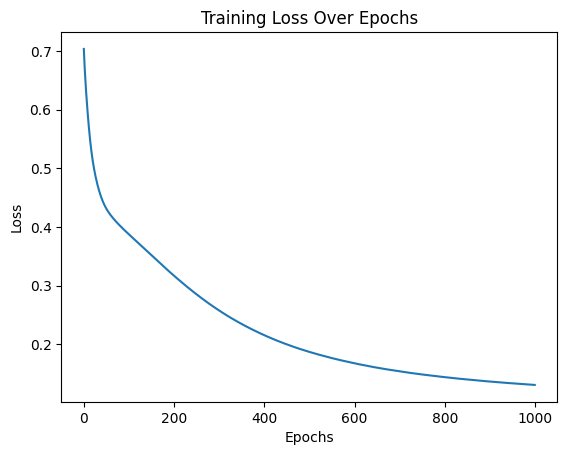

In [ ]:
# Training the model
epochs = 1000  # Number of epochs (Flexibale and changable)

# Lists to store training loss for plotting
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')
    # Save the training loss for plotting
    losses.append(loss.item())

# Plot the training loss
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**6- Evaluate the model on the test set**

Accuracy on test data: 0.5780476114395271


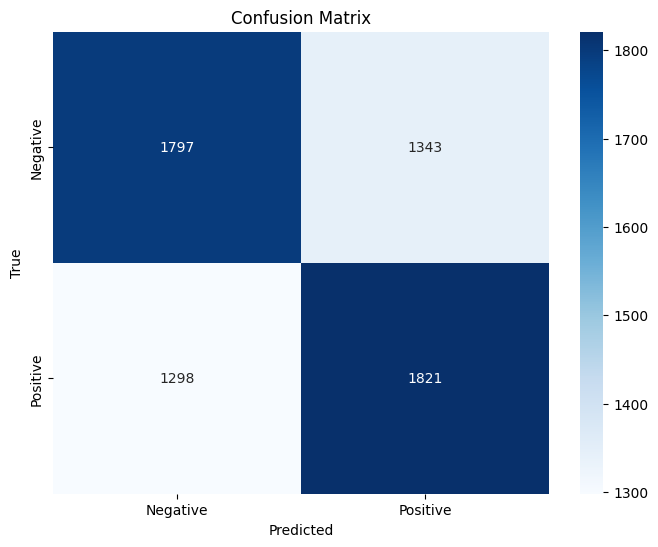

F1 Score on Test Data: 0.5796593983765718


In [ ]:
# Evaluate the model on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions >= 0.5).float()  # Convert probabilities to binary predictions

    accuracy = accuracy_score(y_test_tensor.numpy(), predictions.numpy())
    print(f'Accuracy on test data: {accuracy}')

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test_tensor.numpy(), predictions.numpy())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate F1 score on test set
with torch.no_grad():
    model.eval()
    test_predictions = model(X_test_tensor)
    test_predictions = (test_predictions >= 0.5).float()

    f1_test = precision_recall_fscore_support(y_test_tensor.numpy(), test_predictions.numpy(), average='binary')[2]
    print(f'F1 Score on Test Data: {f1_test}')

**b) Using Tf Features as Input**

**1) Convert the Numpy array data to PyTorch tensors**

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_tf_train_scaled)
X_test_tensor = torch.Tensor(X_tf_test_scaled)
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)

**2) Initialize MLP Model in PyTorch**

In [ ]:
# Define the MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

**3) Initiailize the Hyper-Parameters**

In [ ]:
# Intialize the Hyper-Parameters
input_size = 300      # 300 features in TF-IDF and TF vectors
hidden_size = 64     # Flexible and Adjustable
output_size = 1       # Binary classification (Happy/Sad)

**4) Define Loss Function and Optimizer**

In [ ]:
# Define loss function and optimizer
model = MLPClassifier(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**5) Train the Model**

Epoch [1/1000], Loss: 0.695937991142273
Epoch [101/1000], Loss: 0.4086895287036896
Epoch [201/1000], Loss: 0.3529224395751953
Epoch [301/1000], Loss: 0.31238454580307007
Epoch [401/1000], Loss: 0.28097864985466003
Epoch [501/1000], Loss: 0.2565653324127197
Epoch [601/1000], Loss: 0.23719412088394165
Epoch [701/1000], Loss: 0.22183266282081604
Epoch [801/1000], Loss: 0.20944923162460327
Epoch [901/1000], Loss: 0.19942046701908112


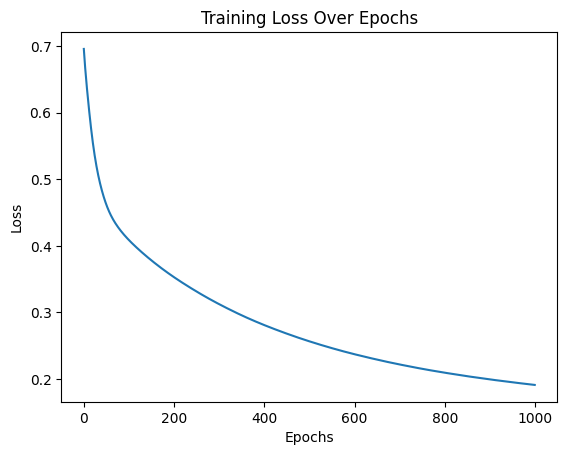

In [ ]:
# Training the model
epochs = 1000  # Number of epochs (Flexibale and changable)

# Lists to store training loss for plotting
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')
    # Save the training loss for plotting
    losses.append(loss.item())

# Plot the training loss
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**6- Evaluate the model on the test set**

Accuracy on test data: 0.5691004952867871


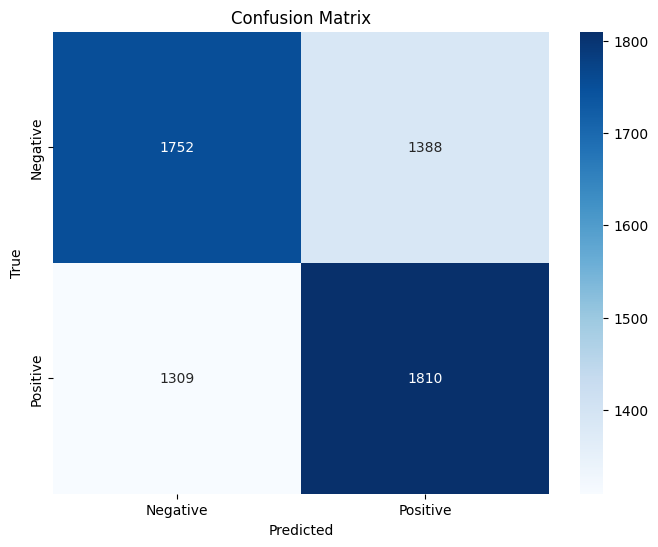

F1 Score on Test Data: 0.5730568307741017


In [ ]:
# Evaluate the model on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions >= 0.5).float()  # Convert probabilities to binary predictions

    accuracy = accuracy_score(y_test_tensor.numpy(), predictions.numpy())
    print(f'Accuracy on test data: {accuracy}')

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test_tensor.numpy(), predictions.numpy())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate F1 score on test set
with torch.no_grad():
    model.eval()
    test_predictions = model(X_test_tensor)
    test_predictions = (test_predictions >= 0.5).float()

    f1_test = precision_recall_fscore_support(y_test_tensor.numpy(), test_predictions.numpy(), average='binary')[2]
    print(f'F1 Score on Test Data: {f1_test}')

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Train Multilayer Perceptron from Scratch and Without Using Pytorch


In [ ]:
# Transpose the data
data_train = X_tfidf_train.T
print(data_train.shape)

data_label = (y_train.reshape((63700, 1))).T
print(data_label.shape)

(300, 63700)
(1, 63700)


**1- Initialize the parameters**

In [ ]:
# Initialize the parameters
def init_params(n):
  """
  Initialize the weights(w) and biases(b) of the hidden layer and output layer between -1 and 1

  Parameters:
  - n: Number of hidden units

  Returns:
  - the initial random values of weights and biases (w1, w2, b1, b2)
  """
  w1 = 2*np.random.rand(n,300)-1
  b1 = 2*np.random.rand(n,1)-1
  w2 = 2*np.random.rand(1,n)-1
  b2 = 2*np.random.rand(1,1)-1
  return w1, b1, w2, b2

**2-Define activation function**

In [ ]:
# Define activation functions sigmoid and ReLU

# Define sigmoid function
def sigmoid(z):
  """
  The definition of sigmoid used for the layer activation function

  Parameter:
  - z: the argument of sigmoid to be calculated

  Returns:
  - the sigmoid of z
  """
  sigmoid = 1/(1 + np.exp(-z))
  return sigmoid

# Define ReLU function
def ReLU(z):
  """
  The definition of ReLU used for the layer activation function

  Parameter:
  - z: the argument of ReLU to be calculated

  Returns:
  - the ReLU of z
  """
  ReLU = np.maximum(0, z)
  return ReLU

**3-Forward Propagation**

In [ ]:
# Forward Propagation
def forward_prop(w1, b1, w2, b2, X, act_func1, act_func2):
  """
  Forward propagation calculation

  Parameters:
  - w1: The first layer weights
  - b1: The first layer biases  - w2: The second layer weights  - b2: The second layer biases
  - X:  The Input data
  - act_func1: The first layer activation function
  - act_func2: The second layer activation function

  Returns:
  - The forward propagation values (Z1, A1, Z2, A2)
  """
  Z1 = np.dot(w1,X) + b1         # unactivated first layer value
  A1 = act_func1(Z1)             # activated first layer value
  Z2 = np.dot(w2,A1) + b2        # unactivated second layer value
  A2 = act_func2(Z2)             # activated second layer value
  return Z1, A1, Z2, A2

**4-Define the derivative**

In [ ]:
# Define the derivative of sigmoid
def deriv_sigmoid(z):
  return sigmoid(z)*(1 - sigmoid(z))

# Define the derivative of ReLU
def deriv_ReLU(z):
  return z > 0

**5-Back Propagation**

In [ ]:
# Back Propagation
def back_prop(Z1, A1, Z2, A2, w2, y, X, deriv_act_func1):
  """
  Backward propagation calculation

  Parameters:
  - Z1: The unactivated first layer value
  - A1: The activated first layer value
  - Z2: The unactivated second layer value
  - A2: The activated second layer value
  - w2: The second layer weights
  - y : The label(output) data
  - X : The features(input) data
  - deriv_act_func1: The dataderiv of first layer activation function

  Returns:
  - The Back propagation values (dZ2, dw2, db2, dz1, dw1, db1)
  """
  m = y.size
  dZ2 = A2 - y                                    # The derivative of loss function with respect to Z2
  dW2 = (1/m) * np.dot(dZ2,A1.T)                  # The derivative of loss function with respect to w2
  db2 = (1/m) * np.sum(dZ2)      #Check        # The derivative of loss function with respect to b2
  dZ1 = np.dot(w2.T,dZ2) * deriv_act_func1(Z1)  #Check  # The derivative of loss function with respect to Z1
  dW1 = (1/m) * np.dot(dZ1,X.T)                   # The derivative of loss function with respect to w2
  db1 = (1/m) * np.sum(dZ1)     #Check         # The derivative of loss function with respect to b2
  return dW1, db1, dW2, db2

**6-Update Parameters**

In [ ]:
# Update parameters
def update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha):
  """
  Update parameters calculations

  Returns:
  - The Updated values of parameters (weights and biases)(w1, b1, w2, b2)
  """

  w1 = w1 - alpha * dW1                          # The updated value of w1
  b1 = b1 - alpha * db1                          # The updated value of b1
  w2 = w2 - alpha * dW2                          # The updated value of w2
  b2 = b2 - alpha * db2                          # The updated value of b2
  return w1, b1, w2, b2

**7-gradient_descent**

In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, y):
  print(predictions, y)
  return np.sum(predictions == y) / y.size

def gradient_descent(X, y, iterations, alpha, n, act_func1, act_func2, deriv_act_func1):
  w1, b1, w2, b2 = init_params(n)
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X, act_func1, act_func2)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, w2, y, X, deriv_act_func1)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
    if i % 50 == 0:
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), y))
  return w1, b1, w2, b2

In [ ]:
gradient_descent(data_train, data_label, 1000, 0.001, 64, ReLU, sigmoid, deriv_ReLU)